## 1.Import DATA

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('Train (2).csv')
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [50]:
df.shape

(8523, 12)

In [51]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 2. Preprocessing

In [53]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [54]:
# mean value of 'Item weight' columns
df['Item_Weight'].mean()

12.857645184136183

In [55]:
# fill the numerical missing value - 'Mean'
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [56]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
# mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [58]:
# Outlet_size value
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [59]:
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [60]:
missing_values = df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [61]:
# fill the categorical missing value 
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [62]:
df.isnull().sum()   # Now every things is filled

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3.Exploratory Data Analysis

In [63]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Numerical feature distribution

In [64]:
sns.set()

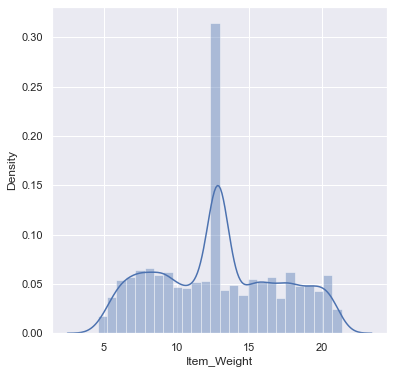

In [65]:
# Item_weight distribution
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Weight'])
plt.show()

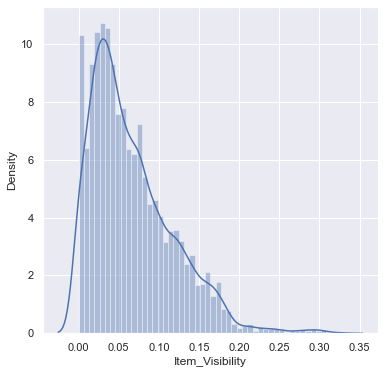

In [66]:
# Item_Visibility distribution
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

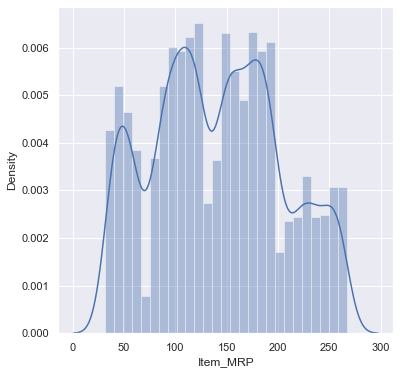

In [67]:
# Item_MRP distribution 
plt.figure(figsize = (6,6))
sns.distplot(df['Item_MRP'])
plt.show()

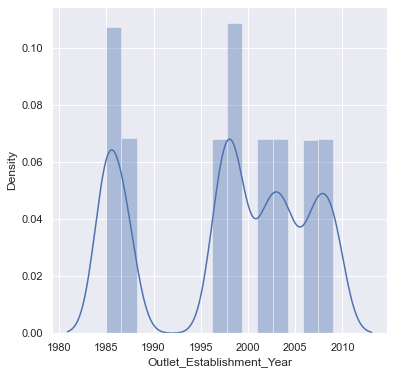

In [68]:
# Outlet_Establishment_Year distribution 
plt.figure(figsize = (6,6))
sns.distplot(df['Outlet_Establishment_Year'])
plt.show()

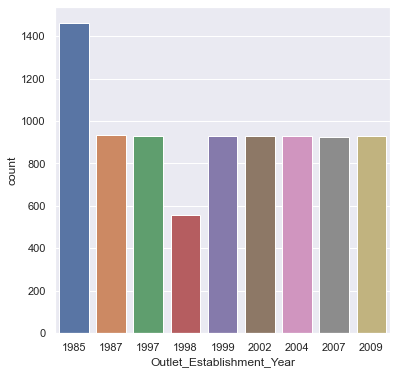

In [69]:
# Outlet_Establishment_Year distribution 
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Establishment_Year', data = df )
plt.show()

### categorical feature

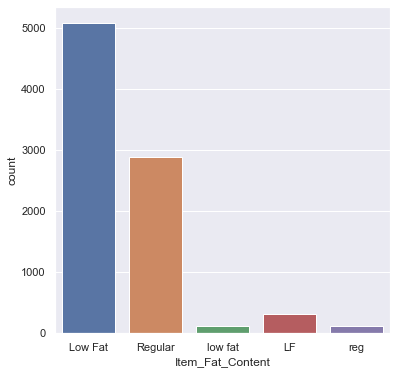

In [70]:
# Item_Fat_Content distribution 
plt.figure(figsize = (6,6))
sns.countplot(x ='Item_Fat_Content', data = df )
plt.show()

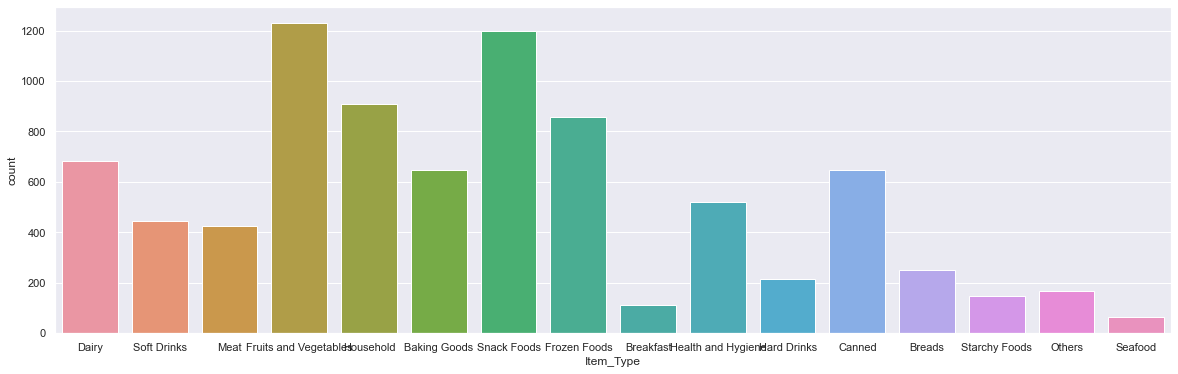

In [71]:
# Item_Type distribution 
plt.figure(figsize = (20,6))
sns.countplot(x ='Item_Type', data = df )
plt.show()

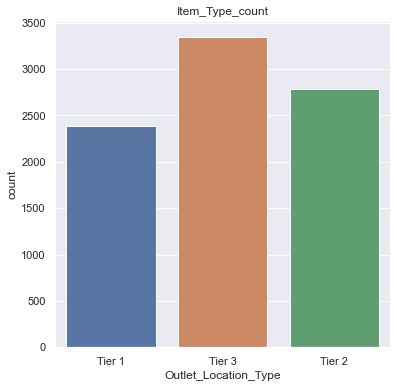

In [72]:
# Outlet_Location_Type distribution 
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Location_Type', data = df )
plt.title('Item_Type_count')
plt.show()

## 4.Label encoding

In [73]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [74]:
df.replace({'Item_Fat_Content': { 'low fat':'Low Fat' , 'LF' : 'Low Fat' , 'reg': 'Regular'}}, inplace = True)

In [75]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [77]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## 5.Correlation Matrix

<AxesSubplot:>

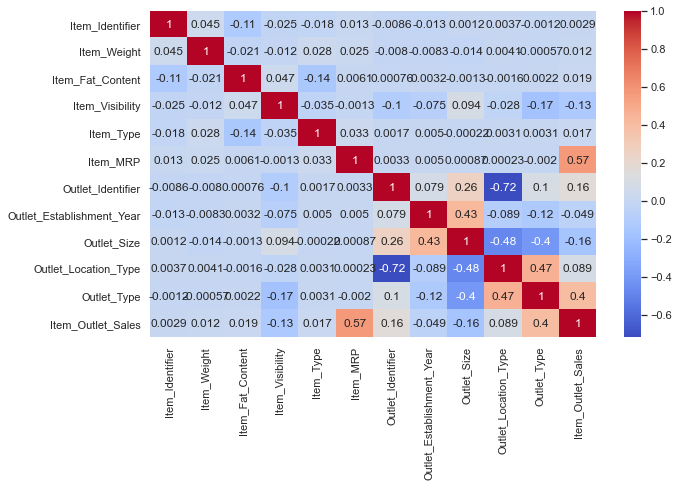

In [78]:
plt.figure(figsize = (10,6))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

## 6.Split data train and Test

In [79]:
X = df.drop(['Item_Outlet_Sales'], axis = 1)
y = df['Item_Outlet_Sales']

In [80]:
X.shape, y.shape

((8523, 11), (8523,))

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## Model Training

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [84]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [85]:
# R sqaured error
error_score = metrics.r2_score(y_train, training_data_prediction)
error_score

0.5071929167339231

## Model xgboost

In [86]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [88]:
# R sqaured error
error_score = metrics.r2_score(y_train, training_data_prediction)
error_score

0.5071929167339231